In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
jpm=pd.read_csv("JPM.csv", index_col=0 ,parse_dates=['Date'])
dis=pd.read_csv("DIS.csv", index_col=0 ,parse_dates=['Date'])
wmt=pd.read_csv("WMT.csv", index_col=0 ,parse_dates=['Date'])


In [5]:
jpm["simple_return"]=(jpm["Adj Close"]-jpm["Adj Close"].shift(1))/jpm["Adj Close"].shift(1)
dis["simple_return"]=(dis["Adj Close"]-dis["Adj Close"].shift(1))/dis["Adj Close"].shift(1)
wmt["simple_return"]=(wmt["Adj Close"]-wmt["Adj Close"].shift(1))/wmt["Adj Close"].shift(1)

In [53]:
returns=pd.DataFrame()
returns["jpm"]=jpm["simple_return"]
returns["dis"]=dis["simple_return"]
returns["wmt"]=wmt["simple_return"]
returns=returns.dropna()
weights=np.array([1/3,1/3,1/3])
returns

,jpm,dis,wmt
Date,,,
2021-01-05,0.005441,0.004277,-0.005323
2021-01-06,0.046956,0.003811,0.006244
2021-01-07,0.032839,-0.003015,-0.000068
2021-01-08,0.001104,0.000616,-0.000136
2021-01-11,0.014924,0.002238,0.004501
...,...,...,...
2021-12-27,0.005723,-0.005403,0.009105
2021-12-28,0.003035,0.015707,0.014351
2021-12-29,-0.000504,-0.002126,-0.000490


In [56]:
returns["portfolio"]=returns[["jpm","dis","wmt"]].dot(weights.T)
portfolio_mean=returns["portfolio"].mean()
portfolio_mean

0.0002489014852097564

In [108]:
cov=returns[["jpm","dis","wmt"]].cov()
portfolio_var=weights.dot(cov.dot(weights.T))
portfolio_var

8.976154546621592e-05

In [150]:
def weights_gen():
    w1=np.random.uniform(low=-1,high=1)
    w2=np.random.uniform(low=-1,high=1)
    w3=np.random.uniform(low=-1,high=1)
    weights_rand=np.array([w1,w2,w3])
    weights_rand/=weights_rand.sum()
    if(weights_rand[0]>1 or weights_rand[0]<-1 or weights_rand[1]<-1 or weights_rand[1]>1 or weights_rand[2]<-1 or weights_rand[2]>1):
        weights_rand=weights_gen()
    return weights_rand
def port_mean_cal(wa,wb,wc):
    port_mean=wa*returns['jpm'].mean()+wb*returns['dis'].mean()+wc*returns['wmt'].mean()
    return port_mean
def port_std_cal(wa,wb,wc):
    wght=np.array([wa,wb,wc])
    port_var=wght.dot(cov.dot(wght.T))
    port_vol=port_var**0.5
    return port_vol


In [151]:
w1=[]
w2=[]
w3=[]
port2_returns=[]
port2_std=[]
for i in range(2000):
    w=weights_gen()
    w1.append(w[0])
    w2.append(w[1])
    w3.append(w[2])
    port2_returns.append(port_mean_cal(w[0],w[1],w[2]))
    port2_std.append(port_std_cal(w[0],w[1],w[2]))
pf2_dict={"w1":w1,"w2":w2,"w3":w3,"return":port2_returns,"var":port2_std}
portfolio2=pd.DataFrame(pf2_dict)


Text(0, 0.5, 'Portfolio Returns')

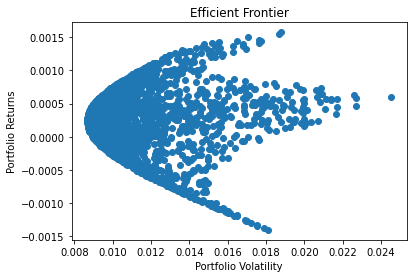

In [153]:
plt.scatter(port2_std,port2_returns)
plt.title("Efficient Frontier")
plt.xlabel("Portfolio Volatility")
plt.ylabel("Portfolio Returns")